<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron

Multi layer perceptron (MLP) is a supplement of feed forward neural network. 
It includes three types of layers: 
* the input layer
* output layer 
* hidden layer



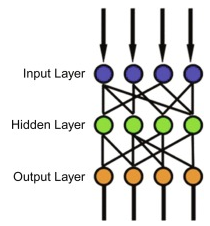

## Activation function
If a MLP has a linear activation function in all neurons, we say that a linear function that maps the weighted inputs to the output of each neuron. Then any number of layers can be reduced to a two-layer input-output model was displayed by linear algebra. 

The two historically common activation functions are both sigmoids listed below:

$y(v_i)=tanh(v_i)$

$y(v_i)=(1+e^{-v_i})^{-1}$



## Layers
The MLP has three or more layers of nonlinearly-activating nodes. Due to the fact that MLPs are fully connected, each node in one layer connects with a certain weight ${w_{ij}}$ to every node in the following layer.

## Neuron Weights
Each neuron has a bias which is always has the value 1.0. For example, a neuron may have two inputs which it requires three weights. One for each input and one for the bias. Weights are often set as a small random values such as 0~0.3. The node weights can then be adjusted based on corrections that minimize the error in the entire output, given by:

$ϵ(n)=\frac{1}{2}\sum_{j}e^2_j(n)$

When using gradient descent, the change in each weight is:

$Δw_{ji}(n)=-η\frac{\partial ϵ(n)}{\partial v_j(n)}y_i(n)$

where $y_{i}$ is the output of the previous neuron and $\eta$ is the learning rate

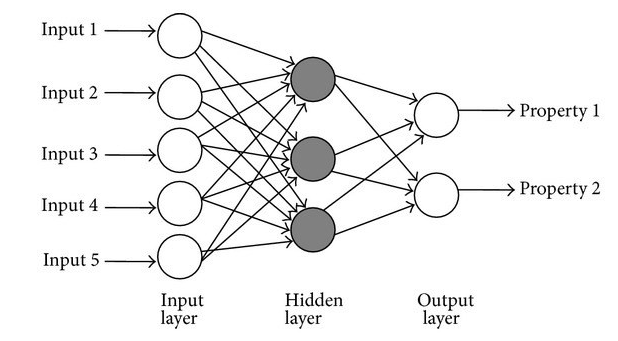

The following packages will be used in this project:
*   tensorflow: [documentation](https://www.tensorflow.org/learn)
*   numpy: [documentation](https://numpy.org/devdocs/)


In [ ]:
from tensorflow import keras # to load the data
import numpy as np
import matplotlib.pyplot as plt

## Dataset Information
The dataset is from MNIST dataset [Here](keras.io/api/datasets/cifar10/)

This is a dataset has:
* 50,000 32x32 color training images 
* 10,000 test images
* labeled over 10 categories
    * airplane, autom obile, bird, cat, beer, dog, frog, horse, ship, truck.

Training data has 50000 training pictures with 32 * 32 pixel 

In [ ]:
(train_X, train_y), (test_X, test_y) = keras.datasets.cifar10.load_data()
train_X.shape

(50000, 32, 32, 3)

In [ ]:
train_X[0].shape

(32, 32, 3)

In [ ]:
train_y[0]

array([6], dtype=uint8)

## Visualizetion
Visualized the first image. 

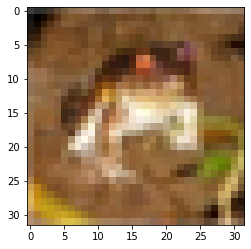

In [ ]:
plt.imshow(train_X[0])

Check the minimum, and maximum of training set which is 0 and 255. 

In [ ]:
np.min(train_X),np.max(train_X)

(0, 255)

Next, we need to scale X 

In [ ]:
train_X = train_X/255
test_X = test_X/255

In [ ]:
test_X[0].shape

(32, 32, 3)

Change the matrix shape to a vector in order to feed into the network. We apply flatten to the first training set.  

In [ ]:
train_X[0].flatten().shape

(3072,)

Then we reshape it to  (3072,1)

In [ ]:
train_X[0].flatten().reshape(3072, 1).shape

(3072, 1)

Write for loops to flatten the X matrix and append them together. Y temporary stores the label vectords. 

In [ ]:
X = []
for x in train_X:
  X.append(x.flatten().reshape(3072, 1))
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)
train_data = [p for p in zip(X, Y)]

Let p be the first train data and display what it is. 

In [ ]:
p = train_data[0]

In [ ]:
print(p[1])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Make sure the shape of p is 3072. Check the shape of training data as well. 

In [ ]:

p[0].shape

(3072, 1)

In [ ]:
np.array(train_data).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(50000, 2)

Do the same thing to test data. 

In [ ]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(3072, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

## Sigmoid neuron
We want a learning algorithm that could improve our neural network by changing the weights. Sigmoid function is the one which can deal with this. 

$σ(z)=\frac{1}{1+e^{-z}}$

$Z=\sum_{i=1}^{m}w_ix_i+bias$

The sigmoid function looks like:

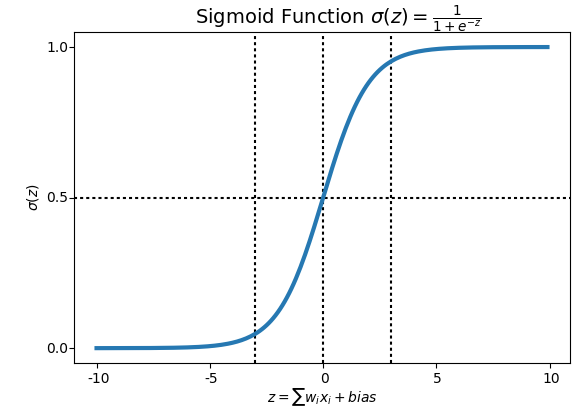

Now we define sigmoid, sigmoid_prime, and mse. 

In [ ]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))


def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

This concept of randomly initializing weights is important because each time you train a deep learning neural network, you are initializing different numbers to the weights. Weights are often initialized to small random values, such as values in the range 0 to 0.3

In [ ]:
def initialize_weights(layers = [3072, 60, 60, 10]):
  W = [[0.0]] 
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1]) 
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [ ]:
W, B = initialize_weights()

In [ ]:
x, y = train_data[0]

Next, set a0 as original data, and z1 as linear combination of weight and data. a1 is our activation function. 

In [ ]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [ ]:
a1.shape

(60, 1)

### New layer
Set a2 as next layer with new input. 

In [ ]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


Repeat this step to get more layers.

In [ ]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


Combine all variables and moving forward. 

In [ ]:
W, B = initialize_weights(layers=[3072, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

In [ ]:
A[-1].shape

(10, 1)

Build a dictionary to store delta value. 

In [ ]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [ ]:
deltas[L-1]

array([[0.13192951],
       [0.11245028],
       [0.14366551],
       [0.09578012],
       [0.1428312 ],
       [0.12851916],
       [0.11047834],
       [0.11158076],
       [0.0619322 ],
       [0.10646676]])

In [ ]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l]) #has delta3 in the previous line

Check the last layer:

In [53]:
deltas[3].shape

(10, 1)

Set the learning rate, and combined everything together. Next do the prediction. 

In [ ]:
alpha = 0.04
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

### Loss function 
We build loss function with feed forward prediction

In [ ]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

Calculate the initial cost which is 1.07

In [ ]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.0733837740828713


### Prediction
The prediction is 6 but the true value is 3. It may because we haven't did enough training such as backpop and gradient descent yet. 

Predicted label = 6
Actual label = [3]


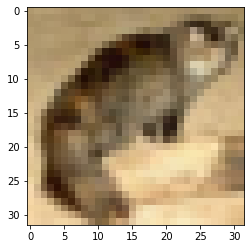

In [ ]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted label = {prediction}")
print(f"Actual label = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Build a gradient descent with epochs. 

In [ ]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

We got 3 costs here because epoch=3.

In [ ]:
stochastic_gradient_descent(W,B,train_data)

Initial Cost = 1.0733837740828713
0 Cost = 3.526607269303918e-05
1 Cost = 1.7127932250215884e-05
2 Cost = 1.1238032836623248e-05


In [ ]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas


  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

  def mini_batch_gradient_descent(self, data, batch_size =15, alpha=0.04, epochs=3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length=len(data)
    for k in range(epochs):
      for j in range(0,data_length-batch_size,batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j+batch_size]:
          A, deltas = self.deltas_dict(p)
          A_list.append(A)

          for i in range(1, self.L):
            self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
            self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

We have 2 costs here by using stochastic gradient descent.  

In [ ]:
net = MultilayerPerceptron(layers=[3072, 60, 60, 10])
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.1033393323945166
2 Cost = 1.0384183366621347e-05


This is mini batch method result. 

In [55]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 1.0384183366621347e-05
2 Cost = 1.0384183366621347e-05


MSE is $1.0337e^{0.5}$

In [ ]:
net.MSE(test_data)

1.0336798084685448e-05

# Reference

Jason Brownlee, Machine Learning Mastery, Crash Course On Multi-Layer Perceptron Neural Networks. May 17,2016. https://machinelearningmastery.com/neural-networks-crash-course/

Wikipedia, Multilayer perceptron. https://en.wikipedia.org/wiki/Multilayer_perceptron

Nahua, Kang. Towards data science. Multi-Layer Neural Networks with Sigmoid Function— Deep Learning for Rookies (2) Jun 27,2017. https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f